In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv


In [12]:
!pip install dash

In [13]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.offline as po
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
import seaborn as sns
import dash
import plotly.express as px
import random
import plotly.figure_factory as ff
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing 
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN #resampling
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [14]:
df = pd.read_csv('../input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv')
df.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [15]:
df.shape

(253680, 22)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [17]:
df['Diabetes_binary'].value_counts()

0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64

In [18]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [19]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

## Univariate Analysis

In [20]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['Age'].value_counts().values.tolist(), 
                      x = df['Age'].value_counts().index, 
                      text=df['Age'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['Age'].value_counts().keys(),
                             values=df['Age'].value_counts().values,textfont = dict(size = 12),
                     hole = .5,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,40000])
fig.update_xaxes(range=[0,15])
#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#FFFDE7',
                    plot_bgcolor= '#FFFDE7',
                    title=dict(text = "Age Distribution",x=0.5,y=0.95),
                    title_font_size=30,
                    width=1000,
                    height=600
                  )
iplot(fig)

In [21]:
df['Age'].value_counts()

9.0     33244
10.0    32194
8.0     30832
7.0     26314
11.0    23533
6.0     19819
13.0    17363
5.0     16157
12.0    15980
4.0     13823
3.0     11123
2.0      7598
1.0      5700
Name: Age, dtype: int64

In [22]:
df['Sex'].value_counts()

0.0    141974
1.0    111706
Name: Sex, dtype: int64

In [23]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['Sex'].map({0:'F',1:'M'}).value_counts().values.tolist(), 
                      x = df['Sex'].map({0:'F',1:'M'}).value_counts().index, 
                      text=df['Sex'].map({0:'F',1:'M'}).value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['Sex'].map({0:'F',1:'M'}).value_counts().keys(),
                             values=df['Sex'].map({0:'F',1:'M'}).value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,150000])
#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#FFFDE7',
                    plot_bgcolor= '#FFFDE7',
                    title=dict(text = "Gender Distribution",x=0.5,y=0.95),
                    title_font_size=30,
                    width=1000,
                    height=600
                  )
iplot(fig)

In [24]:
df.corr().sort_values('Diabetes_binary')

Diabetes_binary    HighBP  HighChol  CholCheck  \
Income                      -0.163919 -0.171235 -0.085459   0.014259   
Education                   -0.124456 -0.141358 -0.070802   0.001510   
PhysActivity                -0.118133 -0.125267 -0.078046   0.004190   
HvyAlcoholConsump           -0.057056 -0.003972 -0.011543  -0.023730   
Veggies                     -0.056584 -0.061266 -0.039874   0.006121   
Fruits                      -0.040779 -0.040555 -0.040859   0.023849   
AnyHealthcare                0.016255  0.038425  0.042230   0.117626   
Sex                          0.031430  0.052207  0.031205  -0.022115   
NoDocbcCost                  0.031433  0.017358  0.013310  -0.058255   
Smoker                       0.060789  0.096991  0.091299  -0.009929   
CholCheck                    0.064761  0.098508  0.085642   1.000000   
MentHlth                     0.069315  0.056456  0.062069  -0.008366   
Stroke                       0.105816  0.129575  0.092620   0.024158   
PhysHlth                     0.171337  0.161212  0.121751   0.031775   
HeartDiseaseorAttack         0.177282  0.209361  0.180765   0.044206   
Age                          0.177442  0.344452  0.272318   0.090321   
HighChol                     0.200276  0.298199  1.000000   0.085642   
BMI                          0.216843  0.213748  0.106722   0.034495   
DiffWalk                     0.218344  0.223618  0.144672   0.040585   
HighBP                       0.263129  1.000000  0.298199   0.098508   
GenHlth                      0.293569  0.300530  0.208426   0.046589   
Diabetes_binary              1.000000  0.263129  0.200276   0.064761   

                           BMI    Smoker    Stroke  HeartDiseaseorAttack  \
Income               -0.100069 -0.123937 -0.128599             -0.141011   
Education            -0.103932 -0.161955 -0.076009             -0.099600   
PhysActivity         -0.147294 -0.087401 -0.069151             -0.087299   
HvyAlcoholConsump    -0.048736  0.101619 -0.016950             -0.028991   
Veggies              -0.062275 -0.030678 -0.041124             -0.039167   
Fruits               -0.087518 -0.077666 -0.013389             -0.019790   
AnyHealthcare        -0.018471 -0.023251  0.008776              0.018734   
Sex                   0.042950  0.093662  0.002978              0.086096   
NoDocbcCost           0.058206  0.048946  0.034804              0.031000   
Smoker                0.013804  1.000000  0.061173              0.114441   
CholCheck             0.034495 -0.009929  0.024158              0.044206   
MentHlth              0.085310  0.092196  0.070172              0.064621   
Stroke                0.020153  0.061173  1.000000              0.203002   
PhysHlth              0.121141  0.116460  0.148944              0.181698   
HeartDiseaseorAttack  0.052904  0.114441  0.203002              1.000000   
Age                  -0.036618  0.120641  0.126974              0.221618   
HighChol              0.106722  0.091299  0.092620              0.180765   
BMI                   1.000000  0.013804  0.020153              0.052904   
DiffWalk              0.197078  0.122463  0.176567              0.212709   
HighBP                0.213748  0.096991  0.129575              0.209361   
GenHlth               0.239185  0.163143  0.177942              0.258383   
Diabetes_binary       0.216843  0.060789  0.105816              0.177282   

                      PhysActivity    Fruits  ...  AnyHealthcare  NoDocbcCost  \
Income                    0.198539  0.079929  ...       0.157999    -0.203182   
Education                 0.199658  0.110187  ...       0.122514    -0.100701   
PhysActivity              1.000000  0.142756  ...       0.035505    -0.061638   
HvyAlcoholConsump         0.012392 -0.035288  ...      -0.010488     0.004684   
Veggies                   0.153150  0.254342  ...       0.029584    -0.032232   
Fruits                    0.142756  1.000000  ...       0.031544    -0.044243   
AnyHealthcare             0.035505  0.031544  ...

**Income, Education, PhysActivity --> Negative correlation**<br>
**GenHlth, HighBP, DiffWalk,BMI  --> Positive correlation**

In [25]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['Income'].map({1:'< $10,000',5:'< $35,000',8:'> $75,000'}).value_counts().values.tolist(), 
                      x = df['Income'].map({1:'< $10,000',5:'< $35,000',8:'> $75,000'}).value_counts().index, 
                      text=df['Income'].map({1:'< $10,000',5:'< $35,000',8:'> $75,000'}).value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['Income'].map({1:'< $10,000',5:'< $35,000',8:'> $75,000'}).value_counts().keys(),
                             values=df['Income'].map({1:'< $10,000',5:'< $35,000',8:'> $75,000'}).value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,150000])
#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#FFFDE7',
                    plot_bgcolor= '#FFFDE7',
                    title=dict(text = "Income Distribution",x=0.5,y=0.95),
                    title_font_size=30,
                    width=1000,
                    height=600
                  )
iplot(fig)

In [26]:
edu = {1:'Never attended school',2:'Elementary',3:'Some high school',
4:'High school graduate',5:'Some college or technical school',6:'College graduate'}

In [27]:
edu

{1: 'Never attended school',
 2: 'Elementary',
 3: 'Some high school',
 4: 'High school graduate',
 5: 'Some college or technical school',
 6: 'College graduate'}

In [28]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['Education'].map(edu).value_counts().values.tolist(), 
                      x = df['Education'].map(edu).value_counts().index, 
                      text=df['Education'].map(edu).value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['Education'].map(edu).value_counts().keys(),
                             values=df['Education'].map(edu).value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,120000])
#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#FFFDE7',
                    plot_bgcolor= '#FFFDE7',
                    title=dict(text = "Education Distribution",x=0.5,y=0.95),
                    title_font_size=30,
                    width=1000,
                    height=600
                  )
iplot(fig)

In [29]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [30]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['PhysActivity'].map({0:'No',1:'Yes'}).value_counts().values.tolist(), 
                      x = df['PhysActivity'].map({0:'No',1:'Yes'}).value_counts().index, 
                      text=df['PhysActivity'].map({0:'No',1:'Yes'}).value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['PhysActivity'].map({0:'No',1:'Yes'}).value_counts().keys(),
                             values=df['PhysActivity'].map({0:'No',1:'Yes'}).value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,220000])
#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#FFFDE7',
                    plot_bgcolor= '#FFFDE7',
                    title=dict(text = "PhysActivity Distribution",x=0.5,y=0.95),
                    title_font_size=30,
                    width=1000,
                    height=600
                  )
iplot(fig)

## Bivariate Analysis

**Income, Education, PhysActivity --> Negative correlation**<br>
**GenHlth, HighBP, DiffWalk,BMI  --> Positive correlation**

In [31]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [32]:
categorical_cols = ['HighBP','HighChol','CholCheck','Smoker','Stroke','HeartDiseaseorAttack',
'PhysActivity','Fruits', 'Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','GenHlth',
'DiffWalk','Sex','Education','Income']
numerical_cols=['BMI','MentHlth', 'PhysHlth']

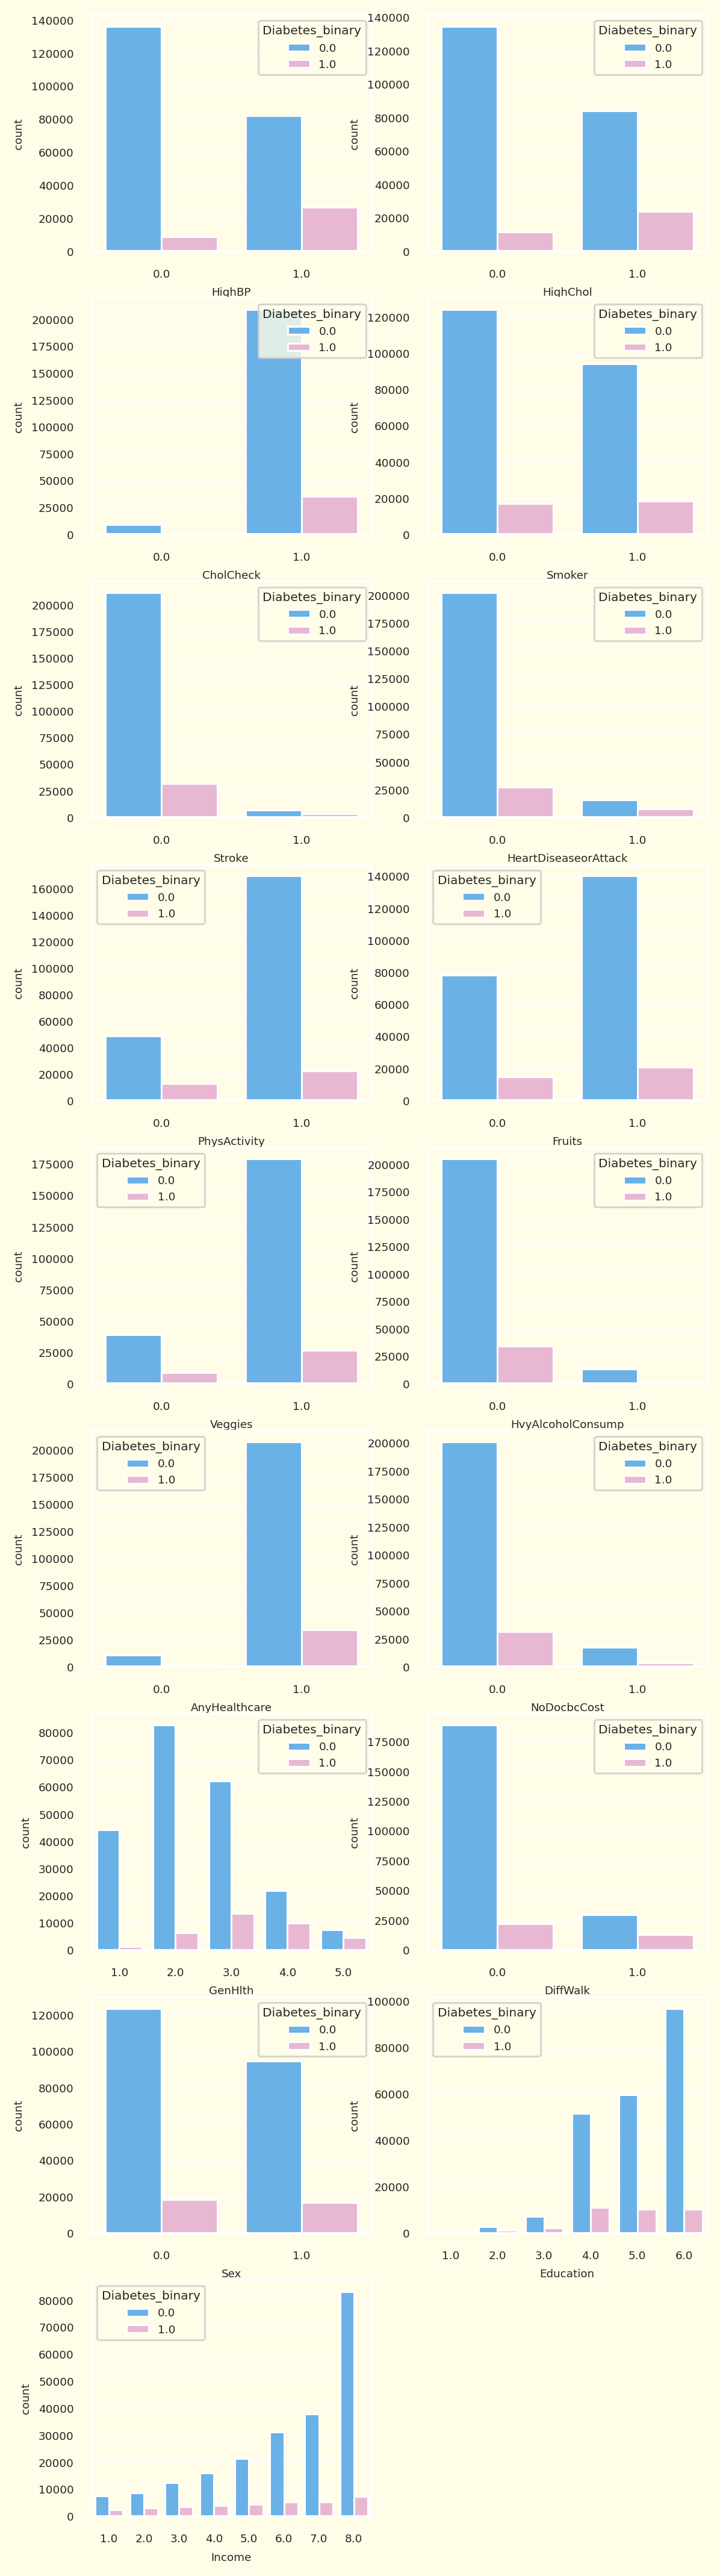

In [33]:
sns.set_theme(rc = {'figure.dpi': 220, 'axes.labelsize': 6, 
                    'axes.facecolor': '#FFFDE7', 'grid.color': '#fffdfa', 
                    'figure.facecolor': '#FFFDE7'}, font_scale = 0.55)
fig, ax = plt.subplots(9, 2, figsize = (6, 25))
for indx, (column, axes) in list(enumerate(list(zip(categorical_cols, ax.flatten())))):
    if column not in 'Diabetes_binary':
        sns.countplot(ax = axes, x = df[column], hue = df['Diabetes_binary'], palette = {'#f0b0d2','#56b4fa'}, alpha = 1)  
else:
    [axes.set_visible(False) for axes in ax.flatten()[indx + 1:]]   
axes_legend = ax.flatten()
axes_legend[1].legend(title = 'Diabetes_binary', loc = 'upper right')
axes_legend[2].legend(title = 'Diabetes_binary', loc = 'upper right')
plt.show()

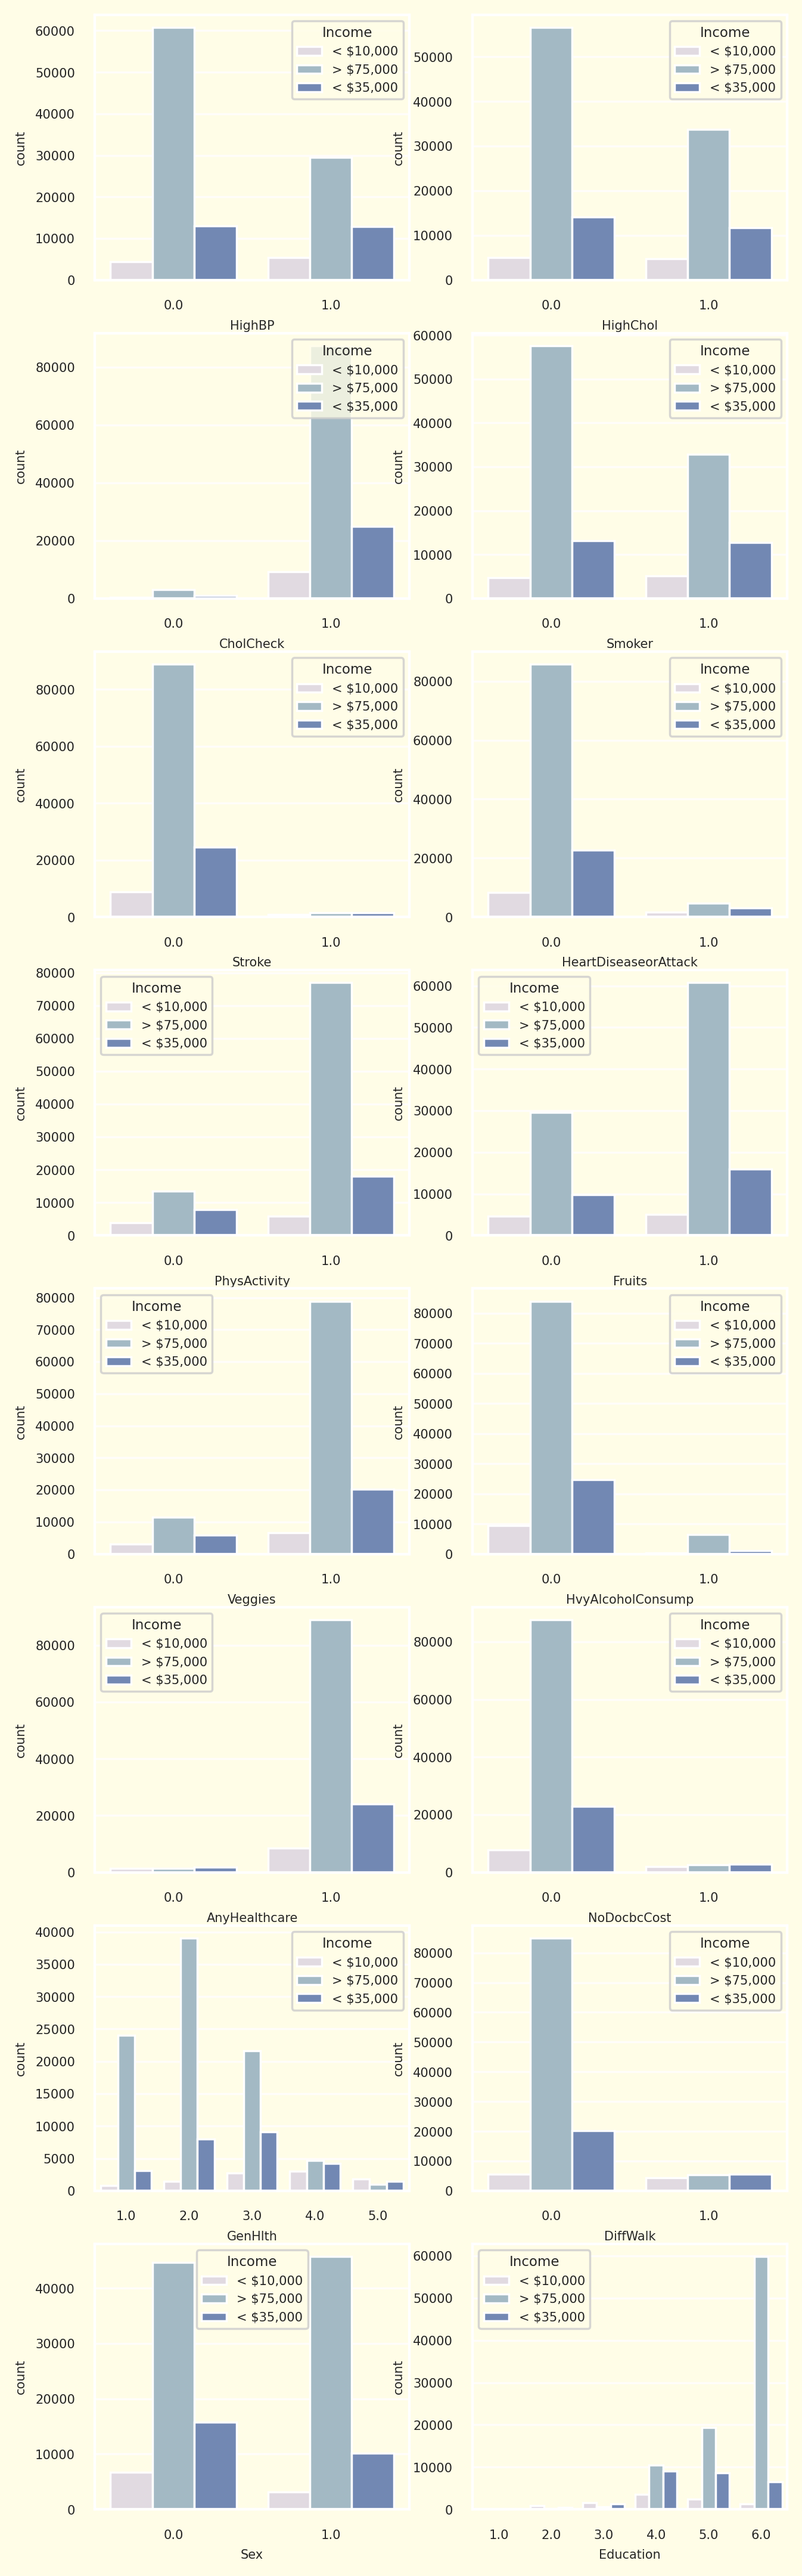

In [34]:
sns.set_theme(rc = {'figure.dpi': 250, 'axes.labelsize': 6, 
                    'axes.facecolor': '#FFFDE7', 'grid.color': '#fffdfa', 
                    'figure.facecolor': '#FFFDE7'}, font_scale = 0.55)
fig, ax = plt.subplots(9, 2, figsize = (6, 25))
cat2 = []
for i in categorical_cols:
    if i not in 'Income':
        cat2.append(i)
for indx, (column, axes) in list(enumerate(list(zip(cat2, ax.flatten())))):
    sns.countplot(ax = axes, x = df[column], hue = df['Income'].map({1:'< $10,000',5:'< $35,000',8:'> $75,000'})
    , palette = colors, alpha = 1)  
else:
    [axes.set_visible(False) for axes in ax.flatten()[indx + 1:]]   
axes_legend = ax.flatten()
axes_legend[1].legend(title = 'Income', loc = 'upper right')
axes_legend[2].legend(title = 'Income', loc = 'upper right')
plt.show()

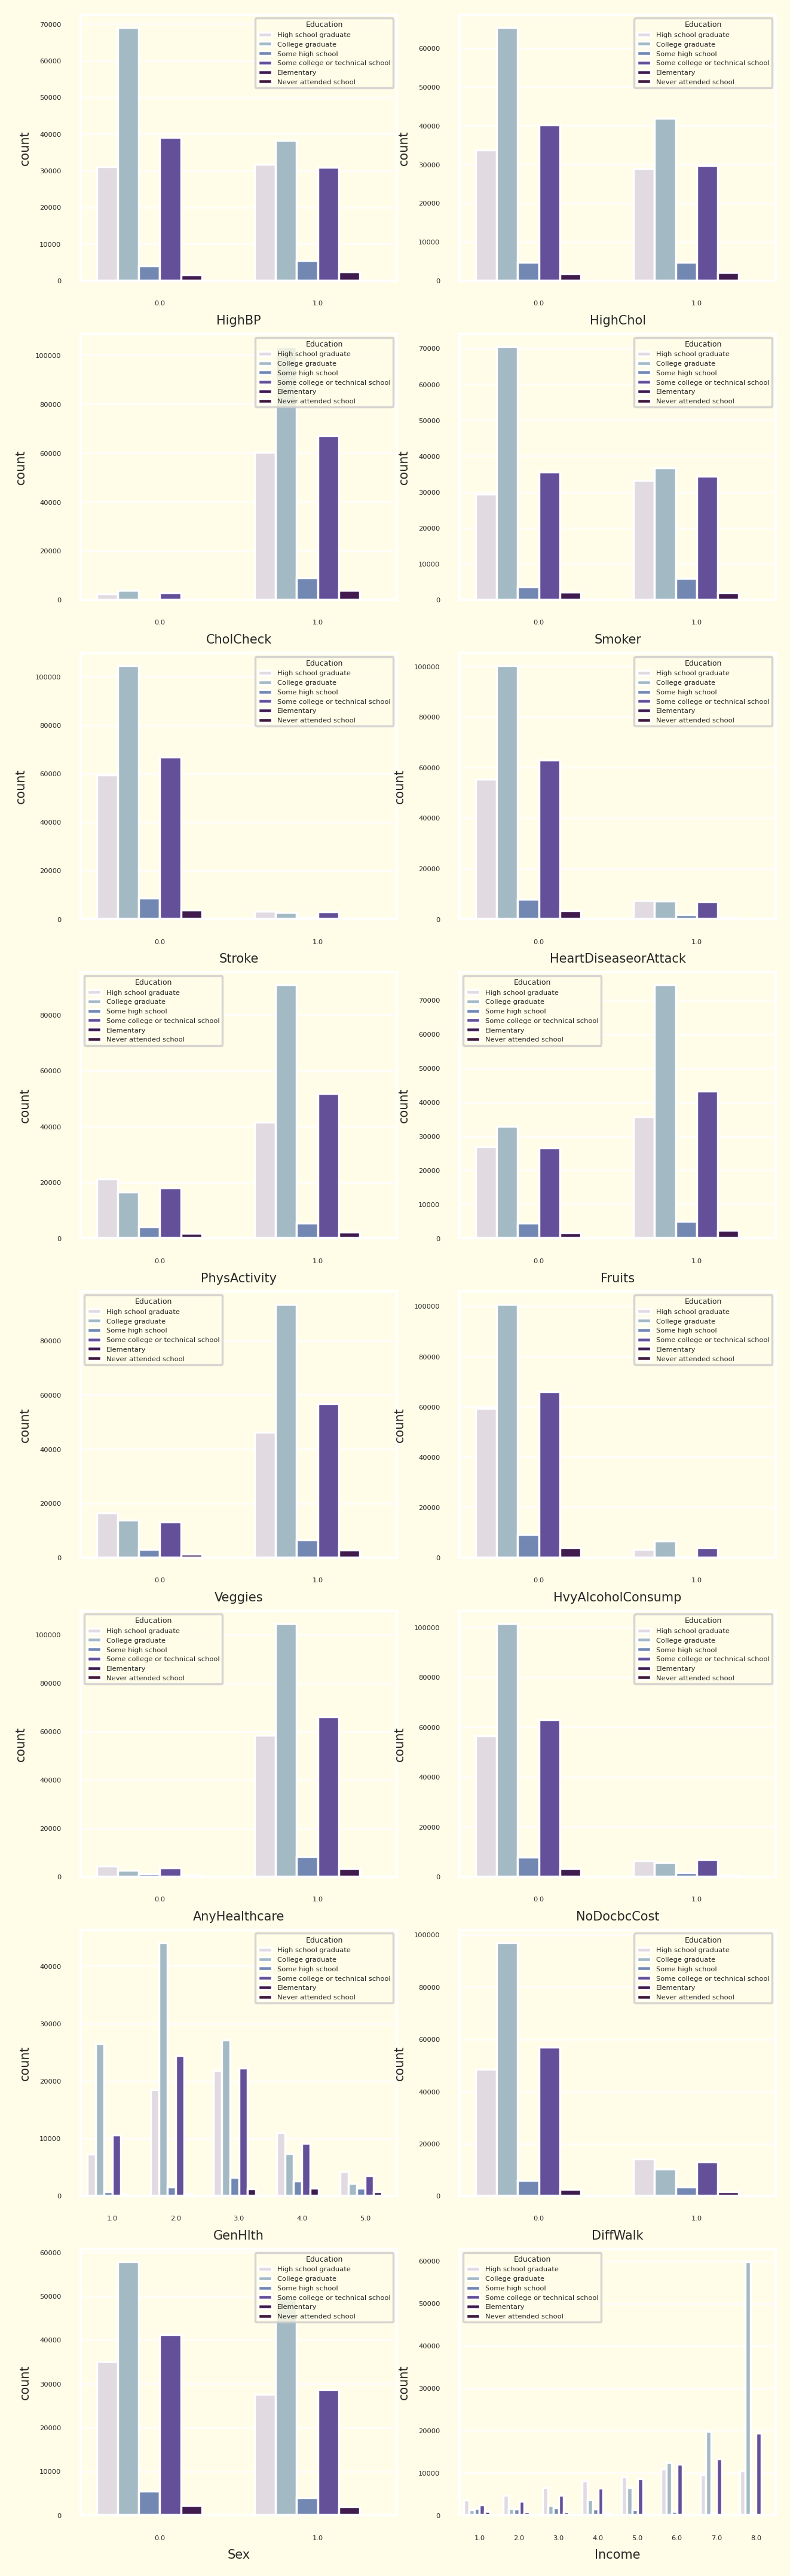

In [35]:
sns.set_theme(rc = {'figure.dpi': 250, 'axes.labelsize': 6, 
                    'axes.facecolor': '#FFFDE7', 'grid.color': '#fffdfa', 
                    'figure.facecolor': '#FFFDE7'}, font_scale = 0.3)
fig, ax = plt.subplots(9, 2, figsize = (6, 25))
cat2 = []
for i in categorical_cols:
    if i not in 'Education':
        cat2.append(i)
for indx, (column, axes) in list(enumerate(list(zip(cat2, ax.flatten())))):
    sns.countplot(ax = axes, x = df[column], hue = df['Education'].map(edu), palette = colors, alpha = 1)  
else:
    [axes.set_visible(False) for axes in ax.flatten()[indx + 1:]]   
axes_legend = ax.flatten()
axes_legend[1].legend(title = 'Education', loc = 'upper right')
axes_legend[2].legend(title = 'Education', loc = 'upper right')
plt.show()

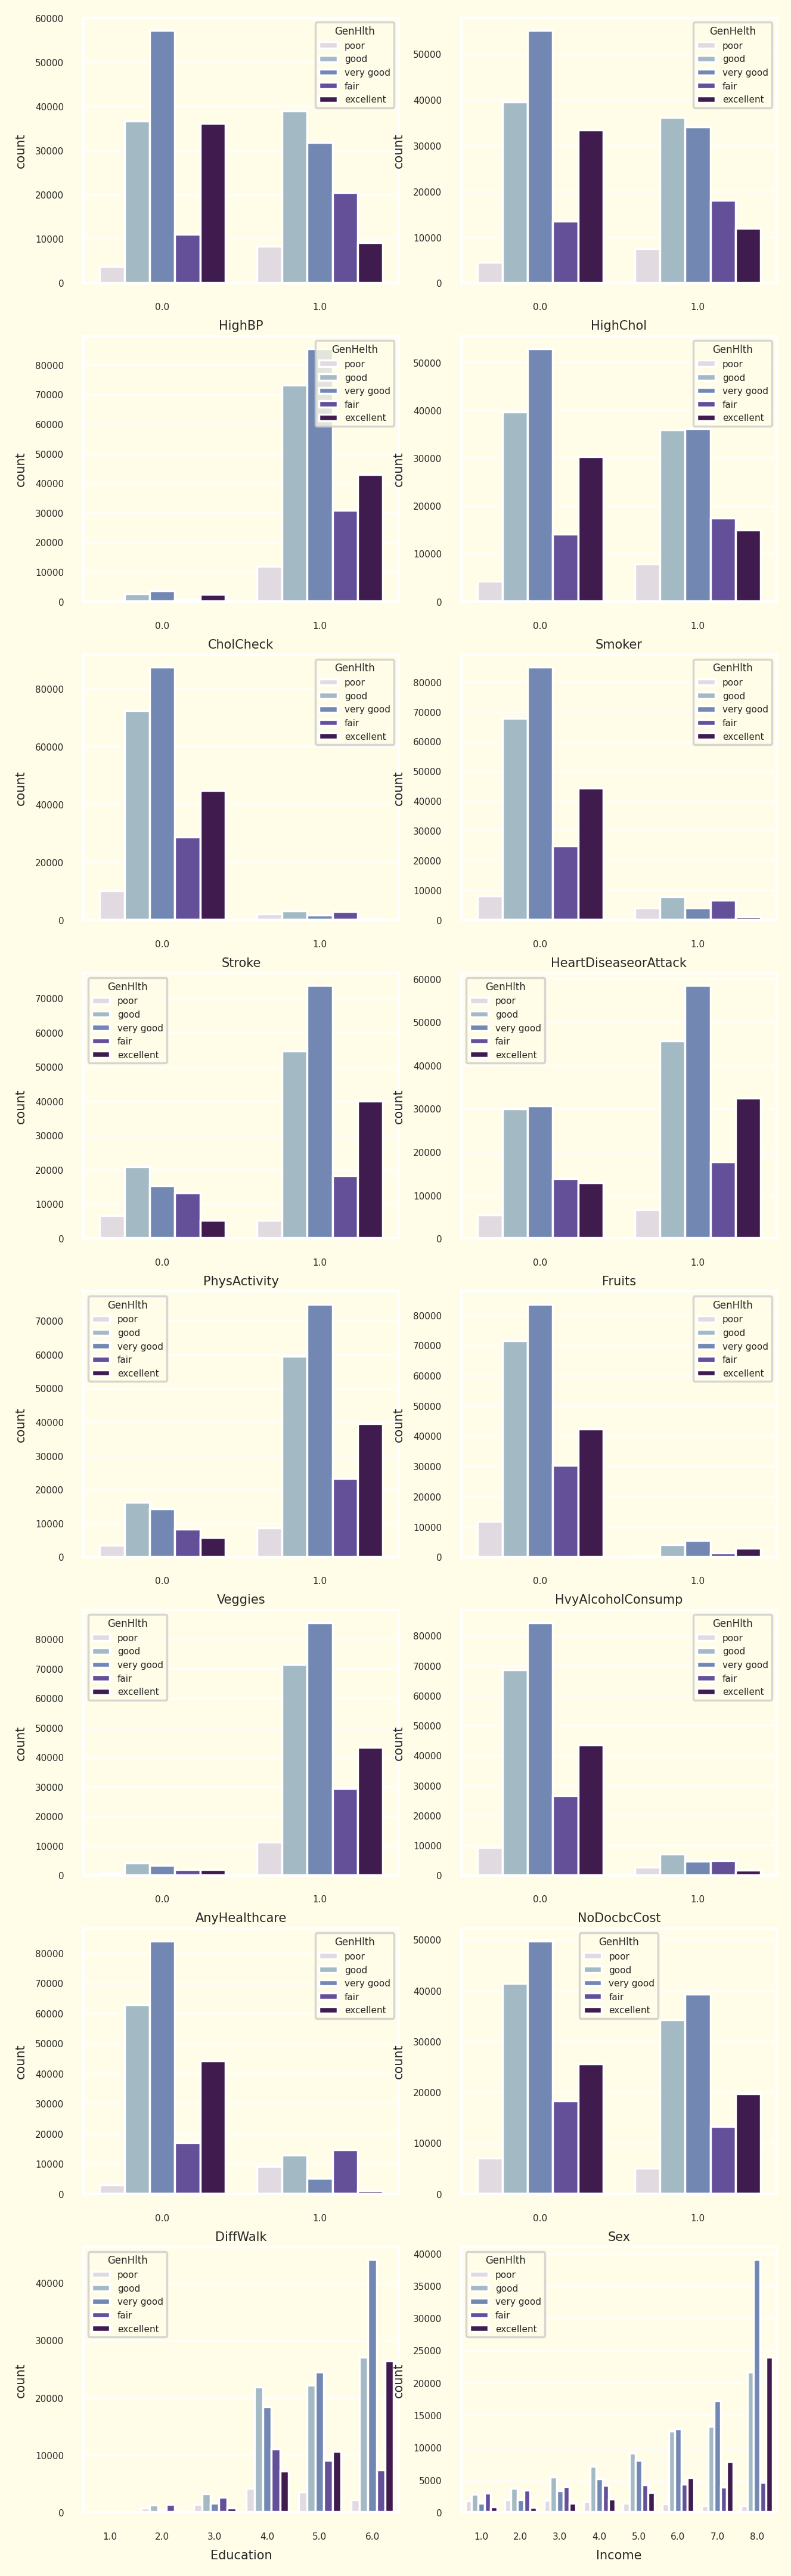

In [36]:
sns.set_theme(rc = {'figure.dpi': 250, 'axes.labelsize': 6, 
                    'axes.facecolor': '#FFFDE7', 'grid.color': '#fffdfa', 
                    'figure.facecolor': '#FFFDE7'}, font_scale = 0.4)
fig, ax = plt.subplots(9, 2, figsize = (6, 25))
cat2 = []
for i in categorical_cols:
    if i not in 'GenHlth':
        cat2.append(i)
for indx, (column, axes) in list(enumerate(list(zip(cat2, ax.flatten())))):
    sns.countplot(ax = axes, x = df[column], 
    hue = df['GenHlth'].map({1:'excellent',2:'very good',3:'good',4:'fair',5:'poor'}), palette = colors, alpha = 1)  
else:
    [axes.set_visible(False) for axes in ax.flatten()[indx + 1:]]   
axes_legend = ax.flatten()
axes_legend[1].legend(title = 'GenHelth', loc = 'upper right')
axes_legend[2].legend(title = 'GenHelth', loc = 'upper right')
plt.show()

In [37]:
numerical_cols

['BMI', 'MentHlth', 'PhysHlth']

In [38]:
px.histogram(df, x=df['BMI'], title='BMI vs. Diabetes', color='Diabetes_binary')

In [39]:
px.histogram(df, x=df['MentHlth'], title='MentHlth vs. Diabetes', color='Diabetes_binary')

In [40]:
px.histogram(df, x=df['PhysHlth'], title='PhysHlth vs. Diabetes', color='Diabetes_binary')

### Plot a Shifted Correlation Matrix

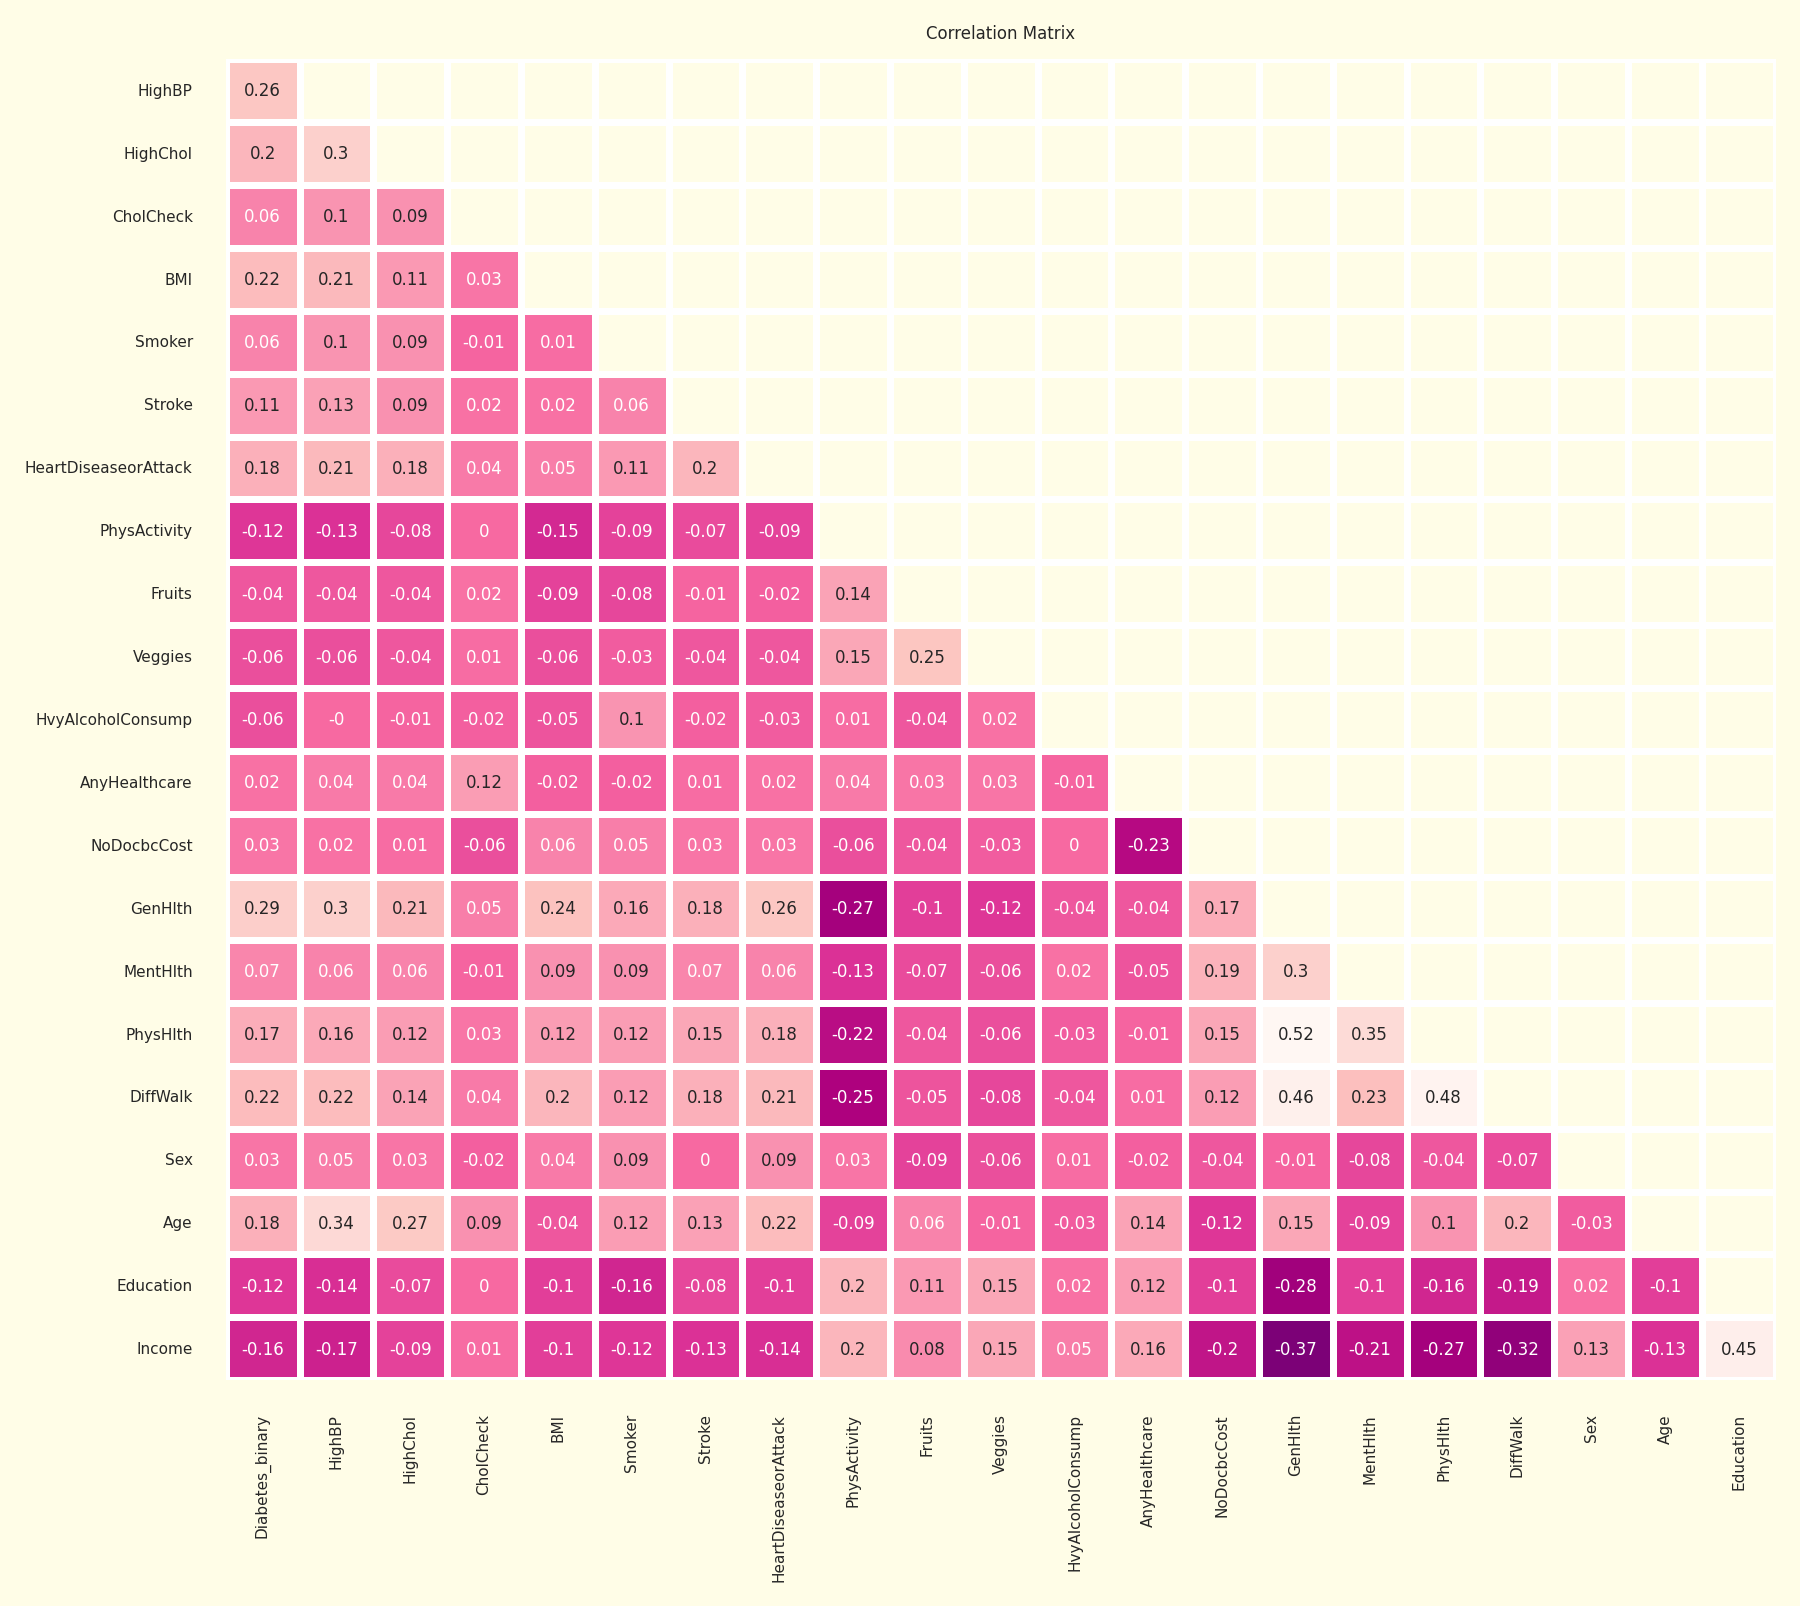

In [41]:
def corrMat(df):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(8,7))
    mask = np.triu(np.ones_like(corr_mat, dtype=bool))
    mask = mask[1:,:-1]
    corr = corr_mat.iloc[1:,:-1].copy()
    sns.heatmap(corr,mask=mask,vmin=-0.5,vmax=0.5,center=0, 
                cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)
    ax.set_title('Correlation Matrix')
    
corrMat(df)

In [42]:
df.shape

(253680, 22)

### Calculate Num. of Outliers

In [43]:
def count_outliers(data,col):
    
    q1 = data[col].quantile(0.25,interpolation='nearest')
    q2 = data[col].quantile(0.5,interpolation='nearest')
    q3 = data[col].quantile(0.75,interpolation='nearest')
    q4 = data[col].quantile(1,interpolation='nearest')

    IQR = q3 -q1
    Lower_Bound = q1 - 1.5*IQR
    Upper_Bound = q3 + 1.5*IQR

    if data[col].min() > Lower_Bound and data[col].max() < Upper_Bound:
        print("No outliers in",i)
    else:
        print("There are outliers in",i)
        x = data[data[col]<Lower_Bound][col].size
        y = data[data[col]>Upper_Bound][col].size
        a.append(i)
        print('Count of outliers are:',x+y)

a = []
for i in numerical_cols:
    count_outliers(df,i)

There are outliers in BMI
Count of outliers are: 9847
There are outliers in MentHlth
Count of outliers are: 36208
There are outliers in PhysHlth
Count of outliers are: 40949


## Scaling Data

In [44]:
x = df.drop(['Diabetes_binary'],axis=1)
y = df['Diabetes_binary']

In [45]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [46]:
scaled_features = scaler.transform(x)
x = pd.DataFrame(scaled_features,columns=df.columns[1:])
x.head()

HighBP  HighChol  CholCheck       BMI    Smoker    Stroke  \
0  1.153688  1.165254   0.196922  1.757936  1.120927 -0.205637   
1 -0.866785 -0.858182  -5.078164 -0.511806  1.120927 -0.205637   
2  1.153688  1.165254   0.196922 -0.057858 -0.892119 -0.205637   
3  1.153688 -0.858182   0.196922 -0.209174 -0.892119 -0.205637   
4  1.153688  1.165254   0.196922 -0.663122 -0.892119 -0.205637   

   HeartDiseaseorAttack  PhysActivity    Fruits   Veggies  ...  AnyHealthcare  \
0             -0.322458     -1.762814 -1.316872  0.482087  ...       0.226863   
1             -0.322458      0.567275 -1.316872 -2.074316  ...      -4.407954   
2             -0.322458     -1.762814  0.759375 -2.074316  ...       0.226863   
3             -0.322458      0.567275  0.759375  0.482087  ...       0.226863   
4             -0.322458      0.567275  0.759375  0.482087  ...       0.226863   

   NoDocbcCost   GenHlth  MentHlth  PhysHlth  DiffWalk       Sex       Age  \
0    -0.303173  2.329121  1.998592  1.233999  2.223615 -0.887021  0.316900   
1     3.298445  0.457294 -0.429630 -0.486592 -0.449718 -0.887021 -0.337933   
2     3.298445  2.329121  3.617407  2.954590  2.223615 -0.887021  0.316900   
3    -0.303173 -0.478619 -0.429630 -0.486592 -0.449718 -0.887021  0.971733   
4    -0.303173 -0.478619 -0.024926 -0.486592 -0.449718 -0.887021  0.971733   

   Education    Income  
0  -1.065595 -1.474487  
1   0.963272 -2.440138  
2  -1.065595  0.939638  
3  -2.080028 -0.026012  
4  -0.051162 -0.991662  

[5 rows x 21 columns]

## Training and Testing Data

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [48]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [49]:
y_pred = knn.predict(x_test)

In [50]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [51]:
df['Diabetes_binary'].value_counts()

0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91     65605
         1.0       0.39      0.21      0.27     10499

    accuracy                           0.85     76104
   macro avg       0.64      0.58      0.59     76104
weighted avg       0.81      0.85      0.83     76104



In [53]:
print(confusion_matrix(y_test,y_pred))

[[62268  3337]
 [ 8323  2176]]


### Due to imbalanced data the accuracy predition about diabates are low so we will fix it with **SMOTE + ENN**<br><br>
### `SMOTE` --> `Synthetic Minority Oversampling Technique`
### **SMOTE + ENN** is technique where more no. of observations are removed from the sample space. ENN is undersampling technique where the nearest neighbors of each of the majority class is estimated. If the nearest neighbors misclassify that particular instance of the majority class, then that instance gets deleted.<br><br>
### Integrating this technique with oversampled data done by **SMOTE** helps in doing extensive data cleaning. Here on misclassification by NN’s samples from both the classes are removed. This results in a more clear and concise class separation.

In [54]:
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x,y)

In [55]:
xre_train,xre_test,yre_train,yre_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

In [56]:
knn_smote = KNeighborsClassifier(n_neighbors = 5)
knn_smote.fit(xre_train,yre_train)

KNeighborsClassifier()

In [57]:
yre_pred = knn_smote.predict(xre_test)

In [58]:
print(classification_report(yre_test,yre_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94     43386
           1       0.93      0.99      0.96     57976

    accuracy                           0.95    101362
   macro avg       0.95      0.94      0.95    101362
weighted avg       0.95      0.95      0.95    101362



Now we see that there are huge differenece before and after **resampling data**

In [59]:
print("Accuracy:",metrics.accuracy_score(yre_test,yre_pred))

Accuracy: 0.9476036384443874


In [60]:
# error_rate= []
# for i in range(1,40):
#     knn_smote = KNeighborsClassifier(n_neighbors = i)
#     knn_smote.fit(xre_train,yre_train)
#     yre_pred_i = knn_smote.predict(xre_test)
#     error_rate.append(np.mean(yre_pred_i != yre_test))

In [61]:
# plt.figure(figsize = (10,6))
# plt.plot(range(1,40),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
# plt.title('Error Rate vs. n_neighbors')
# plt.xlabel('n_neighbors')
# plt.ylabel('Error Rate')

## Random Forest Technique

In [62]:
model_rf = RandomForestClassifier(n_jobs=-1, random_state=42,n_estimators=150)

In [63]:
model_rf.fit(xre_train,yre_train)

RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=42)

In [64]:
yrf_pred = model_rf.predict(xre_test)
yrf_pred

array([0., 0., 1., ..., 0., 1., 0.])

In [65]:
print(classification_report(yre_test,yrf_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     43386
           1       0.96      0.96      0.96     57976

    accuracy                           0.96    101362
   macro avg       0.96      0.95      0.95    101362
weighted avg       0.96      0.96      0.96    101362



In [66]:
importance_rf = pd.DataFrame({
    'feature': xre_train.columns,
    'score': model_rf.feature_importances_
}).sort_values('score', ascending=False)

importance_rf.head(10)

feature     score
13    GenHlth  0.201410
3         BMI  0.145866
0      HighBP  0.135866
18        Age  0.128174
20     Income  0.080782
1    HighChol  0.062024
15   PhysHlth  0.052245
19  Education  0.038650
16   DiffWalk  0.027907
14   MentHlth  0.025807

[Text(0.5, 0, 'Score'), Text(0, 0.5, 'Feature')]

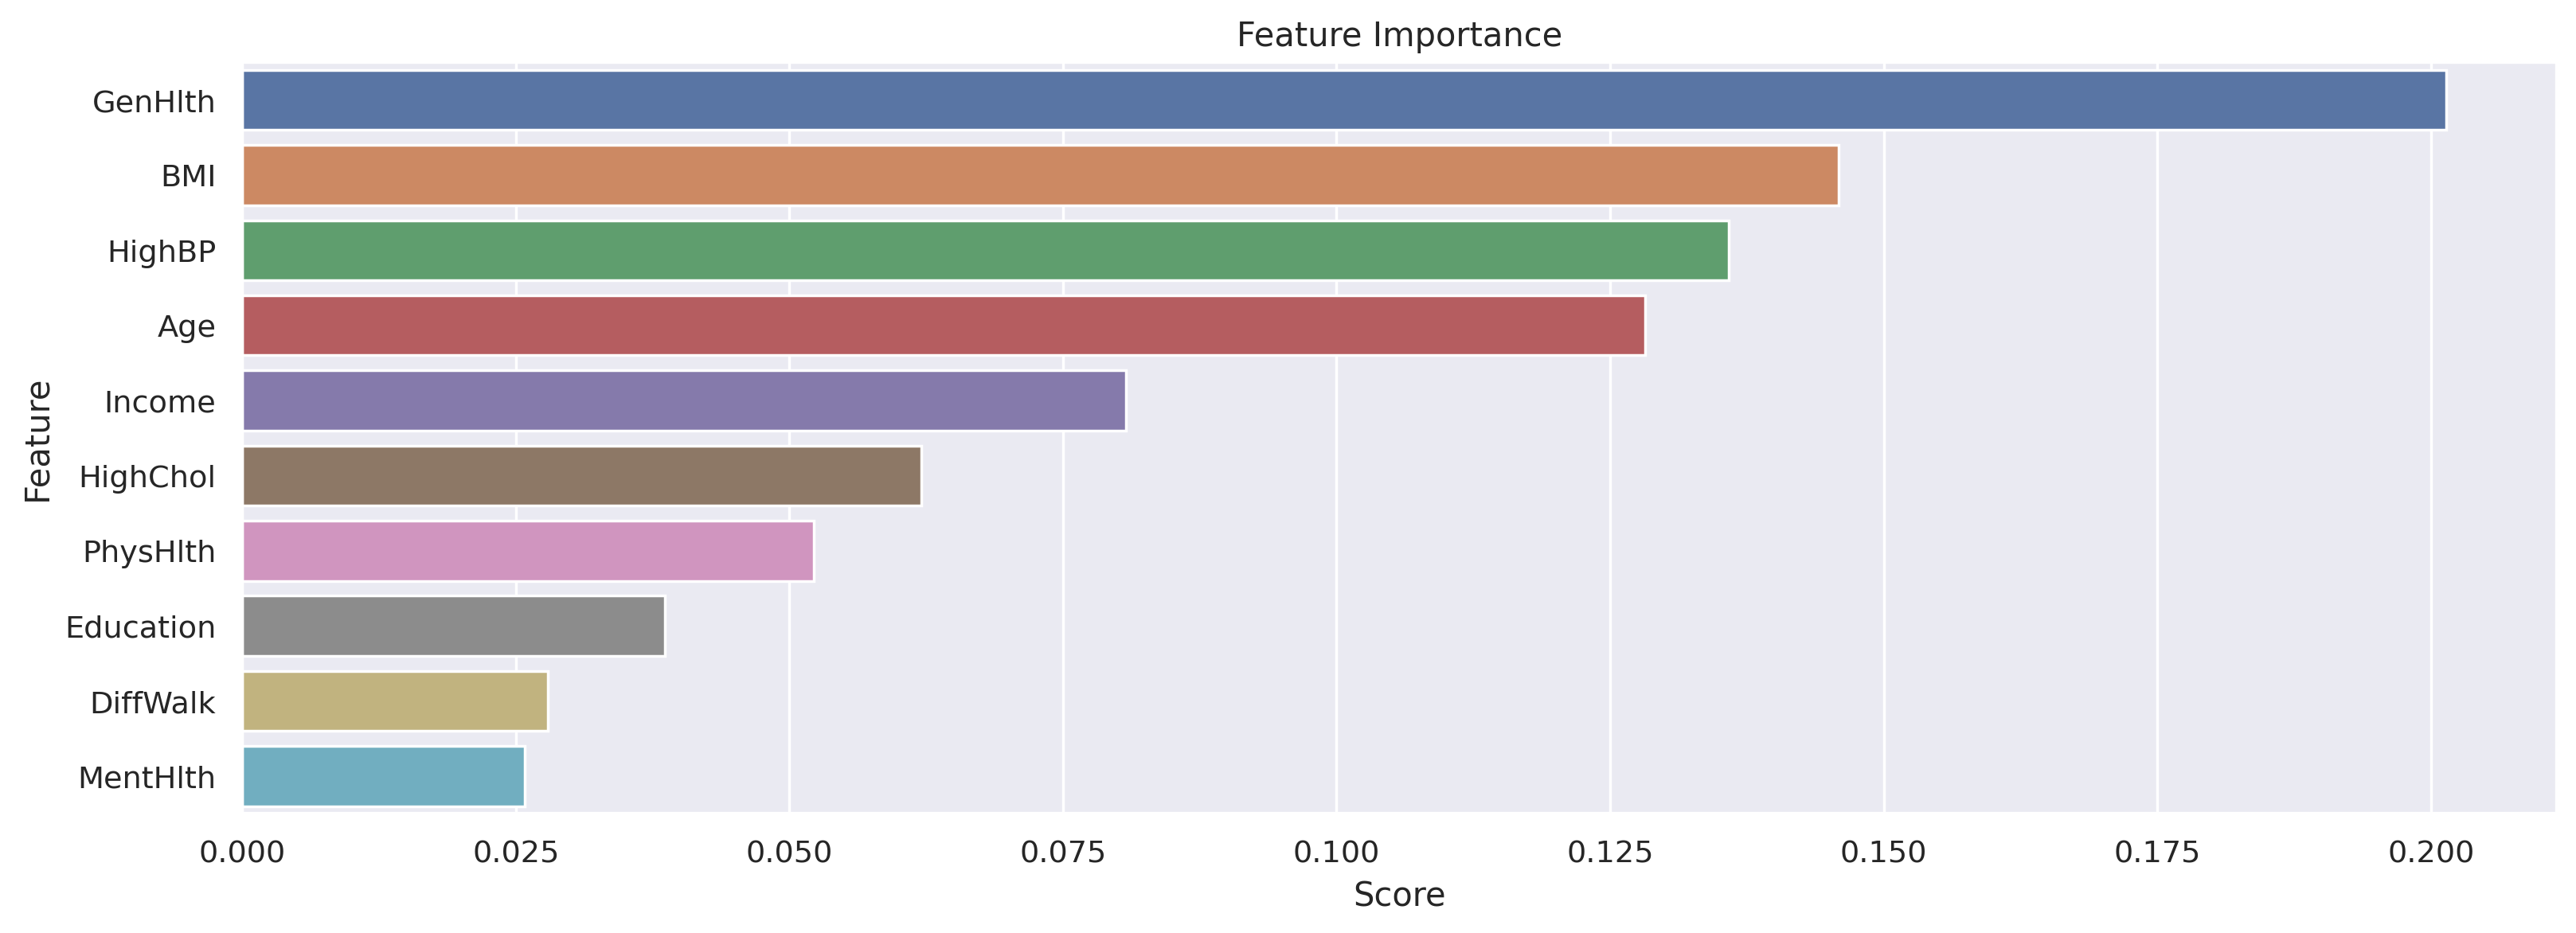

In [86]:
# Income, Education, PhysActivity --> Negative correlation
# GenHlth, HighBP, DiffWalk,BMI --> Positive correlation
plt.figure(figsize = (15,5))
sns.set(font_scale = 1)
plt.title('Feature Importance')
ax = sns.barplot(data=importance_rf.head(10), x='score', y='feature')
ax.set(xlabel='Score', ylabel='Feature')